In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
IPython_default = plt.rcParams.copy()
%matplotlib inline
import os
import re
import math as mt
from scipy.stats import norm
import matplotlib.mlab as mlab
import seaborn as sns
plt.rcParams.update(IPython_default)

In [2]:
def Calculate_stereo_rate(RingComp,RINGCOMPCUT,RingCont,RINGCONTCUT,ImpactDiff,IMPACTDIFFCUT):    
    VIEWANGLE = 3.5 # deg
    IMPACT_PARAMETER = 150 # m
    Flux = 200 # m^-2 s^-1 sr^-1

    Solid_angle = 2 * mt.pi * (1 - mt.cos(np.radians(3.5)))
    Area = mt.pi * mt.pow(IMPACT_PARAMETER,2)
    Nsim = 1e7
    Nrec = len(RingCont[(RingComp > RINGCOMPCUT) & 
                        (RingCont > RINGCONTCUT) & 
                        (ImpactDiff < IMPACTDIFFCUT)])
    print("Nrec = ", Nrec)
    rate = Flux * Solid_angle * Area * Nrec / Nsim  # Hz
    erate = Flux * Solid_angle * Area * mt.sqrt(Nrec) / Nsim # Hz
    #print("Number of seconds simulated: ", Nsim / (Flux * Solid_angle * Area) )
    
    return rate, erate

Nrec =  5715
The rate of muons is 94.7+-1.3 Hz
Nrec =  725
The rate of well reconstructed muons (< 10 m) containment is 12.0+-0.4 Hz
Nrec =  2368
The rate of well reconstructed muons (> 90%) pixel ring containment is 39.2+-0.8 Hz
Nrec =  639
The rate of well reconstructed muons (> 90%) ring completeness is 10.6+-0.4 Hz
Nrec =  1937
The rate of well reconstructed muons (> 90%) ring containment is 32.1+-0.7 Hz
Nrec =  116
The rate of well reconstructed muons all cuts is 1.9+-0.2 Hz


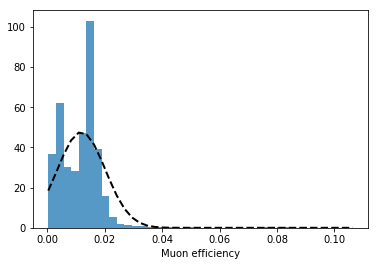

In [3]:
maindir='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Stereo/Array_centered/'
RINGCOMPCUT = 0.9 # containment of pixels above threshold inside a ring
RINGCONTCUT = 0.9 # Angular cut for muon containment within the camera
IMPACTDIFFCUT = 10. # Difference between reconstructed and real Impact parameter
#maindir='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/simtel_sample/from_Alison'

fig,ax = plt.subplots()

sfn = sorted(os.listdir(maindir + 'files')) # Sort the filename list

RingWidth = []
MuonEff = []
ImpactParam = []
RingCont = []
RingComp = []
RingPixComp = []
Core_x = []
Core_y = []
Impact_arr_x = []
Impact_arr_y = []
MCImpactP = []
ImpactDiff = []
RingSize = []
RingRadius = []
NTels = []

for filename in sfn:
    if filename.endswith(".fits"):
        #print("Opening file: ", filename)
        table=fits.open("%s/%s" % (maindir + 'files',filename))
        data=table[1].data
        
        MuonEff = np.concatenate([MuonEff,data.field(0)])
        RingWidth = np.concatenate([RingWidth,data.field(2)])
        ImpactParam = np.concatenate([ImpactParam,data.field(1)])
        RingCont = np.concatenate([RingCont,data.field(3)])
        RingComp = np.concatenate([RingComp,data.field(4)])
        RingPixComp = np.concatenate([RingPixComp,data.field(5)])
        Core_x = np.concatenate([Core_x,data.field(6)])
        Core_y = np.concatenate([Core_y,data.field(7)])
        Impact_arr_x = np.concatenate([Impact_arr_x,data.field(8)])
        Impact_arr_y = np.concatenate([Impact_arr_y,data.field(9)])
        MCImpactP = np.concatenate([MCImpactP,data.field(10)])
        ImpactDiff = np.concatenate([ImpactDiff,data.field(11)])
        RingSize = np.concatenate([RingSize,data.field(12)])
        RingRadius = np.concatenate([RingRadius,data.field(13)])
        NTels = np.concatenate([NTels,data.field(14)])
        
(mu, sigma) = norm.fit(MuonEff)
n, bins, patches = ax.hist(MuonEff, 40, normed=1, alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y, 'k--', linewidth=2)
ax.set_xlabel('Muon efficiency')

rate, erate = Calculate_stereo_rate(RingPixComp, -1, RingCont, -1, ImpactDiff, 1e10)
print("The rate of muons is %.1f+-%.1f Hz" % (rate, erate))

rate, erate = Calculate_stereo_rate(RingPixComp, -1, RingCont, -1, ImpactDiff, IMPACTDIFFCUT)
print("The rate of well reconstructed muons (< %i m) containment is %.1f+-%.1f Hz" % (IMPACTDIFFCUT, rate, erate))

rate, erate = Calculate_stereo_rate(RingPixComp, RINGCOMPCUT, RingCont, -1, ImpactDiff, 1e10)
print("The rate of well reconstructed muons (> %i%%) pixel ring containment is %.1f+-%.1f Hz" % (RINGCOMPCUT*100, rate, erate))

rate, erate = Calculate_stereo_rate(RingComp, RINGCOMPCUT, RingCont, -1, ImpactDiff, 1e10)
print("The rate of well reconstructed muons (> %i%%) ring completeness is %.1f+-%.1f Hz" % (RINGCOMPCUT*100, rate, erate))

rate, erate = Calculate_stereo_rate(RingPixComp, -1, RingCont, RINGCONTCUT, ImpactDiff, 1e10)
print("The rate of well reconstructed muons (> %i%%) ring containment is %.1f+-%.1f Hz" % (RINGCONTCUT*100, rate, erate))

rate, erate = Calculate_stereo_rate(RingPixComp, RINGCOMPCUT, RingCont, RINGCONTCUT, ImpactDiff, IMPACTDIFFCUT)
print("The rate of well reconstructed muons all cuts is %.1f+-%.1f Hz" % (rate, erate))

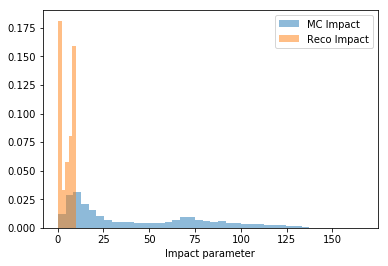

In [4]:
fig,ax = plt.subplots()
n, bins, patches = ax.hist(MCImpactP, 40, normed=1, alpha=0.5, label='MC Impact')
n, bins, patches = ax.hist(ImpactParam, 5, normed=1, alpha=0.5, label='Reco Impact')
#n, bins, patches = ax.hist(ImpactDiff, 40, normed=1, alpha=0.5, label='Impact difference (MC-Reco)')
ax.legend()
ax.set_xlabel('Impact parameter')
fig.savefig(maindir+'figures/Impact.png')


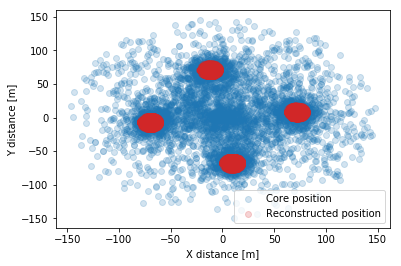

In [5]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
#ax.scatter(Core_x[RingComp > 0.9], Core_y[RingComp > 0.9], label='Core position (full rings)',color='C2', alpha=0.8)
#ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (full ring_pix)',color='C4', alpha=0.8)

#ax.scatter(Impact_arr_x[ImpactDiff > 10.], Impact_arr_y[ImpactDiff > 10.], label='Reconstructed pos < 10',color='C2')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core.png')

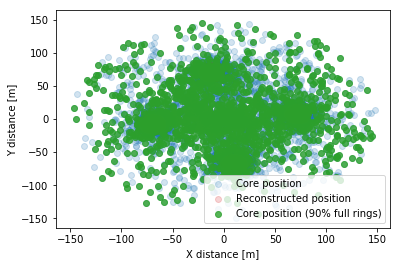

In [6]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
ax.scatter(Core_x[RingCont > 0.9], Core_y[RingCont > 0.9], label='Core position (90% full rings)',color='C2', alpha=0.8)
#ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (full ring_pix)',color='C4', alpha=0.8)

#ax.scatter(Impact_arr_x[ImpactDiff > 10.], Impact_arr_y[ImpactDiff > 10.], label='Reconstructed pos < 10',color='C2')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core_RingCont90.png')

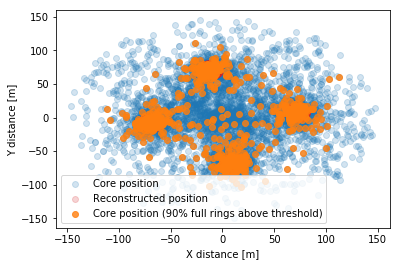

In [7]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
#ax.scatter(Core_x[RingCont > 0.9], Core_y[RingCont > 0.9], label='Core position (90% full rings)',color='C2', alpha=0.8)
ax.scatter(Core_x[RingComp > 0.9], Core_y[RingComp > 0.9], label='Core position (90% full rings above threshold)',color='C1', alpha=0.8)
#ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (full ring_pix)',color='C4', alpha=0.8)

#ax.scatter(Impact_arr_x[ImpactDiff > 10.], Impact_arr_y[ImpactDiff > 10.], label='Reconstructed pos < 10',color='C2')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core_RingComp90.png')

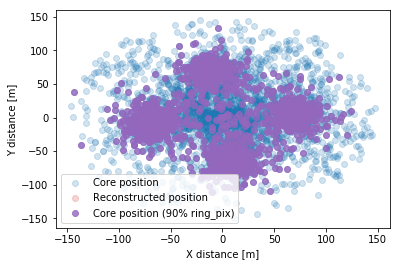

In [8]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
#ax.scatter(Core_x[RingComp > 0.9], Core_y[RingComp > 0.9], label='Core position (full rings)',color='C2', alpha=0.8)
ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (90% ring_pix)',color='C4', alpha=0.8)

#ax.scatter(Impact_arr_x[ImpactDiff > 10.], Impact_arr_y[ImpactDiff > 10.], label='Reconstructed pos < 10',color='C2')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core_RingPixComp90.png')

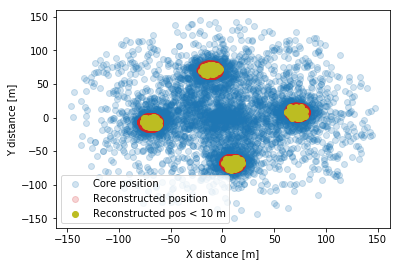

In [9]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
#ax.scatter(Core_x[RingComp > 0.9], Core_y[RingComp > 0.9], label='Core position (full rings)',color='C2', alpha=0.8)
#ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (full ring_pix)',color='C4', alpha=0.8)

ax.scatter(Impact_arr_x[ImpactDiff < 10.], Impact_arr_y[ImpactDiff < 10.], label='Reconstructed pos < 10 m',color='C8')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core_ImpactDiff10m.png')

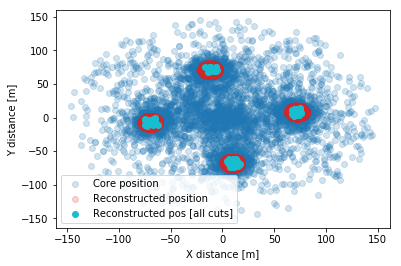

In [10]:
fig,ax = plt.subplots()
ax.scatter(Core_x, Core_y, label='Core position', alpha=0.2)
ax.scatter(Impact_arr_x, Impact_arr_y, label='Reconstructed position',color='C3', alpha=0.2)
#ax.scatter(Core_x[RingComp > 0.9], Core_y[RingComp > 0.9], label='Core position (full rings)',color='C2', alpha=0.8)
#ax.scatter(Core_x[RingPixComp > 0.9], Core_y[RingPixComp > 0.9], label='Core position (full ring_pix)',color='C4', alpha=0.8)

ax.scatter(Impact_arr_x[(ImpactDiff < 10.) & (RingCont > 0.9) & (RingPixComp > 0.9)], 
           Impact_arr_y[(ImpactDiff < 10.) & (RingCont > 0.9) & (RingPixComp > 0.9)], 
           label='Reconstructed pos [all cuts]',color='C9')

ax.legend()
ax.set_xlabel('X distance [m]')
ax.set_ylabel('Y distance [m]')
fig.savefig(maindir+'figures/Reco_core_all_cuts.png')

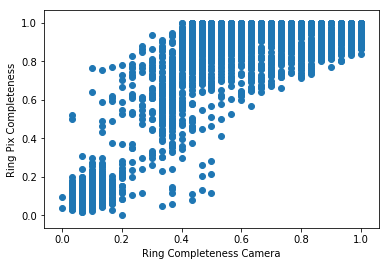

In [11]:
fig,ax = plt.subplots()
ax.scatter(RingComp, RingPixComp)
ax.set_xlabel('Ring Completeness Camera')
ax.set_ylabel('Ring Pix Completeness')
fig.savefig(maindir+'figures/Ring_completeness.png')

Text(0,0.5,'Muon Size [pe]')

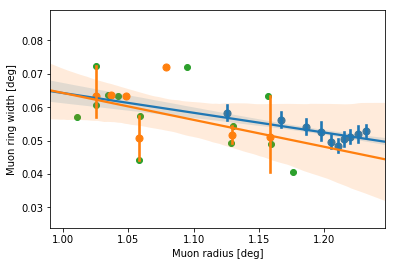

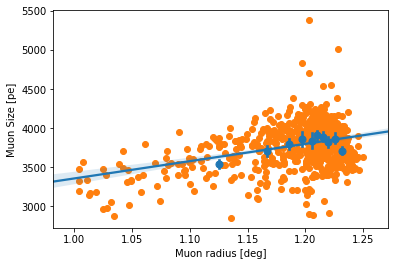

In [12]:
fig,ax = plt.subplots()
ax.scatter(RingRadius[(RingComp > 0.9) & (NTels == 1)], 
           RingWidth[(RingComp > 0.9) & (NTels == 1)], color='C2',zorder=1)
ax = sns.regplot(x=RingRadius[(RingComp > 0.9) & (NTels > 1)], y=RingWidth[(RingComp > 0.9) & (NTels > 1)], x_bins=10)
ax = sns.regplot(x=RingRadius[(RingComp > 0.9) & (NTels == 1)], y=RingWidth[(RingComp > 0.9) & (NTels == 1)], x_bins=10)

ax.set_xlabel('Muon radius [deg]')
ax.set_ylabel('Muon ring width [deg]')


fig,ax2 = plt.subplots()
ax2.scatter(RingRadius[(RingComp > 0.9)], 
           RingSize[(RingComp > 0.9)], color='C1',zorder=1)
ax2=sns.regplot(x=RingRadius[(RingComp > 0.9) & (NTels > 1)], y=RingSize[(RingComp > 0.9) & (NTels > 1)], x_bins=10)

ax2.set_xlabel('Muon radius [deg]')
ax2.set_ylabel('Muon Size [pe]')

In [13]:
#****************** PLOTS FOR DIFFERENT OPTICAL EFFICIENCIES *******************

In [14]:
OPT_EFF=[0.6, 0.7, 0.8, 0.9, 1.0]

RingR = []
RingS = []
RingW = []
RingC = []
NT = []
MEff = []

for opt_eff in OPT_EFF:
    maindir='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Stereo/Array_centered_OptEff%.1f/' % (opt_eff)

    sfn = sorted(os.listdir(maindir + 'files')) # Sort the filename list

    RingWidth = []
    MuonEff = []
    ImpactParam = []
    RingCont = []
    RingComp = []
    RingPixComp = []
    Core_x = []
    Core_y = []
    Impact_arr_x = []
    Impact_arr_y = []
    MCImpactP = []
    ImpactDiff = []
    RingSize = []
    RingRadius = []
    NTels = []

    for filename in sfn:
        if filename.endswith(".fits"):
            table=fits.open("%s/%s" % (maindir + 'files',filename))
            data=table[1].data
        
            MuonEff = np.concatenate([MuonEff,data.field(0)])
            RingWidth = np.concatenate([RingWidth,data.field(2)])
            ImpactParam = np.concatenate([ImpactParam,data.field(1)])
            RingCont = np.concatenate([RingCont,data.field(3)])
            RingComp = np.concatenate([RingComp,data.field(4)])
            RingPixComp = np.concatenate([RingPixComp,data.field(5)])
            Core_x = np.concatenate([Core_x,data.field(6)])
            Core_y = np.concatenate([Core_y,data.field(7)])
            Impact_arr_x = np.concatenate([Impact_arr_x,data.field(8)])
            Impact_arr_y = np.concatenate([Impact_arr_y,data.field(9)])
            MCImpactP = np.concatenate([MCImpactP,data.field(10)])
            ImpactDiff = np.concatenate([ImpactDiff,data.field(11)])
            RingSize = np.concatenate([RingSize,data.field(12)])
            RingRadius = np.concatenate([RingRadius,data.field(13)])
            NTels = np.concatenate([NTels,data.field(14)])
 
    RingR.append(RingRadius)
    RingS.append(RingSize)
    RingW.append(RingWidth)
    RingC.append(RingComp)
    NT.append(NTels)
    MEff.append(MuonEff)

[ 1.07760889  1.04729359  1.15844392  1.02737013  1.11397056  1.15241907
  1.1056444   1.1772415   1.04659556  1.15528075  1.05122584  1.0580992 ]
[ 1.07898194  1.13080268  1.1564301   1.00728272  1.16789069  1.02756938
  1.0467561   1.09629278  1.20194056  1.05653726  1.20067765  1.09016634
  1.15569476  1.15765856  1.07915704  1.01279924  1.04458383  1.00602061
  1.06025644  1.20623828]
[ 1.01524771  1.13004448  1.15352152  1.16541997  1.02894067  1.0495114
  1.05944045  1.03271574  1.14610448  1.17761609  1.15612988  1.15844474
  1.08118771  1.00967274  1.00445776  1.05754793  1.02287925]
[ 1.04731816  1.03614073  1.00398378  1.06115692]
[ 1.13011343  1.02497359  1.12829256  1.05789895  1.15881682  1.09472394
  1.15647283  1.0110132   1.04223116  1.05912698  1.02501562  1.03434475
  1.17578366]


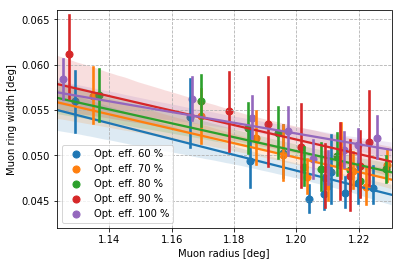

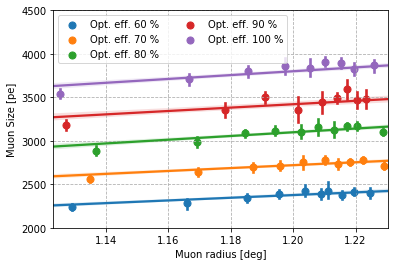

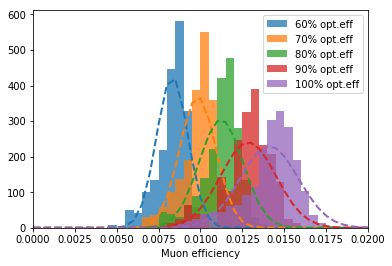

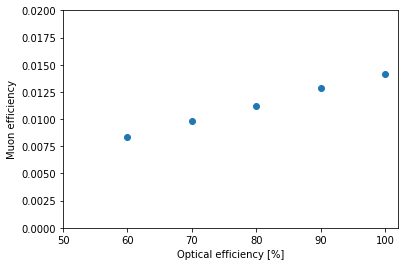

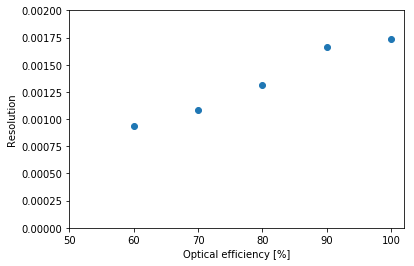

In [15]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

count=0
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for (r,s,w,c,e,ntel,m,col) in zip(RingR,RingS,RingW,RingC,OPT_EFF,NT,MEff,colors):
    #ax.scatter(r[(c > 0.9)], 
    #       w[(c > 0.9)], color='C2',zorder=1)
    sns.regplot(x=r[(c > 0.9) & (ntel > 1)], y=w[(c > 0.9) & (ntel > 1)], 
                     x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax, color=col)
    #ax.scatter(r[(c > 0.9) & (ntel == 1)], w[(c > 0.9) & (ntel == 1)],color=col)

    print(r[(c > 0.9) & (ntel == 1)])
    sns.regplot(x=r[(c > 0.9) & (ntel > 1)], y=s[(c > 0.9) & (ntel > 1)], 
                    x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax2, color=col)

    n, bins, patches = ax3.hist(m[(c > 0.9) & (ntel > 1)], 40, range=[0,0.02], 
                                normed=1, alpha=0.75,label=("%.0f%% opt.eff" % (e*100)), color=col)
    (mu, sigma) = norm.fit(m[(c > 0.9) & (ntel > 1) & (m < 0.025)]) # Fit data         
    y = mlab.normpdf(bins, mu, sigma)
    l = ax3.plot(bins, y, 'k--', linewidth=2, color=col)

    ax4.scatter(e*100,mu,color='C0')
    ax5.scatter(e*100,sigma,color='C0')
    count = count + 1
    if (count==5): 
        break
ax.set_xlabel('Muon radius [deg]')
ax.set_ylabel('Muon ring width [deg]')
ax.grid(linestyle="dashed")
ax.set_ylim(0.042,0.066)
ax.legend()
    
ax2.grid(linestyle="dashed")
ax2.legend(ncol=2)
ax2.set_xlabel('Muon radius [deg]')
ax2.set_ylabel('Muon Size [pe]')
ax2.set_ylim(2000,4500)

ax3.legend()
ax3.set_xlim(0,0.02)
ax3.set_xlabel('Muon efficiency')

ax4.set_xlim(50,102)
ax4.set_ylim(0,0.02)
ax4.set_xlabel('Optical efficiency [%]')
ax4.set_ylabel('Muon efficiency')

ax5.set_xlim(50,102)
ax5.set_ylim(0,0.002)
ax5.set_xlabel('Optical efficiency [%]')
ax5.set_ylabel('Resolution')

fig.savefig(maindir+'../figures/Width_vs_radius_several_eff.png')
fig2.savefig(maindir+'../figures/Size_vs_radius_several_eff.png')
fig3.savefig(maindir+'../figures/Muon_eff_hist_several_eff.png')
fig4.savefig(maindir+'../figures/Muon_eff_vs_opt_eff.png')
fig5.savefig(maindir+'../figures/Muon_res_vs_opt_eff.png')
plt.show()

In [16]:
#****************** PLOTS FOR DIFFERENT MISALIGNMENTS *******************

In [17]:
#MIR_MIS=[0.0, 0.5, 1.0, 1.5, 2.0]
MIR_MIS=[0.00125, 0.0025, 0.0035, 0.005, 0.0075, 0.01, 0.0125, 0.025]
#MIR_MIS=[0.0125, 0.025, 0.035, 0.05, 0.075, 0.1]
#MIR_MIS=[0.0125, 0.025, 0.035]

RingR = []
RingS = []
RingW = []
RingC = []
NT = []
MEff = []

for mir_mis in MIR_MIS:
    #maindir='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Stereo/Array_centered_MirMis%.1f/' % (mir_mis)
    maindir='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Stereo/Array_centered_MirMis'+str(mir_mis)+'/'

    sfn = sorted(os.listdir(maindir + 'files')) # Sort the filename list

    RingWidth = []
    MuonEff = []
    ImpactParam = []
    RingCont = []
    RingComp = []
    RingPixComp = []
    Core_x = []
    Core_y = []
    Impact_arr_x = []
    Impact_arr_y = []
    MCImpactP = []
    ImpactDiff = []
    RingSize = []
    RingRadius = []
    NTels = []

    for filename in sfn:
        if filename.endswith(".fits"):
            table=fits.open("%s/%s" % (maindir + 'files',filename))
            data=table[1].data
        
            MuonEff = np.concatenate([MuonEff,data.field(0)])
            RingWidth = np.concatenate([RingWidth,data.field(2)])
            ImpactParam = np.concatenate([ImpactParam,data.field(1)])
            RingCont = np.concatenate([RingCont,data.field(3)])
            RingComp = np.concatenate([RingComp,data.field(4)])
            RingPixComp = np.concatenate([RingPixComp,data.field(5)])
            Core_x = np.concatenate([Core_x,data.field(6)])
            Core_y = np.concatenate([Core_y,data.field(7)])
            Impact_arr_x = np.concatenate([Impact_arr_x,data.field(8)])
            Impact_arr_y = np.concatenate([Impact_arr_y,data.field(9)])
            MCImpactP = np.concatenate([MCImpactP,data.field(10)])
            ImpactDiff = np.concatenate([ImpactDiff,data.field(11)])
            RingSize = np.concatenate([RingSize,data.field(12)])
            RingRadius = np.concatenate([RingRadius,data.field(13)])
            NTels = np.concatenate([NTels,data.field(14)])
 
    RingR.append(RingRadius)
    RingS.append(RingSize)
    RingW.append(RingWidth)
    RingC.append(RingComp)
    NT.append(NTels)
    MEff.append(MuonEff)

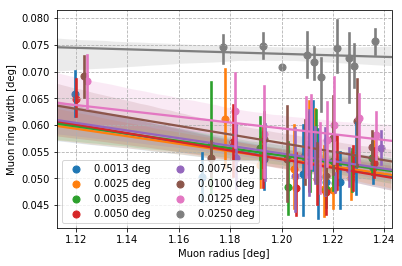

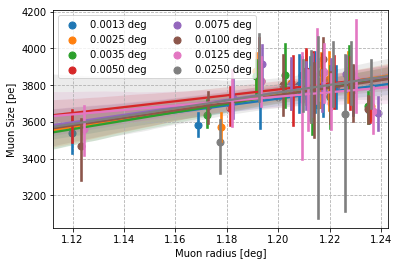

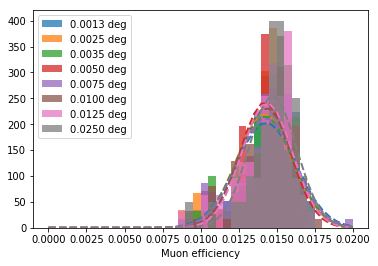

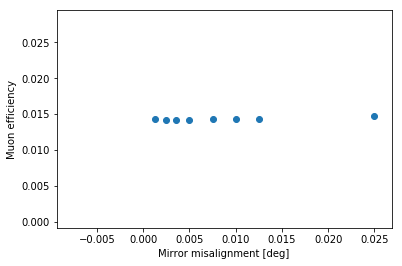

In [18]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()

count=0
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
for (r,s,w,c,mis,ntel,m,col) in zip(RingR,RingS,RingW,RingC,MIR_MIS,NT,MEff,colors):
    #ax.scatter(r[(c > 0.9)], 
    #       w[(c > 0.9)], color='C2',zorder=1)
    sns.regplot(x=r[(c > 0.9) & (ntel > 1)], y=w[(c > 0.9) & (ntel > 1)], 
                     x_bins=10, label='%.4f deg' %(mis), ax=ax, color=col)
    #ax.scatter(r[(c > 0.9) & (ntel > 1)], w[(c > 0.9) & (ntel > 1)],label='Mirr. Mis. %.4f deg' %(mis),color=col)
    sns.regplot(x=r[(c > 0.9) & (ntel > 1)], y=s[(c > 0.9) & (ntel > 1)], 
                    x_bins=10, label='%.4f deg' %(mis), ax=ax2, color=col)
    #ax2.scatter(x=r[(c > 0.9) & (ntel > 1)], y=s[(c > 0.9) & (ntel > 1)],label='Mirr. Mis. %.4f deg' %(mis), color=col)
    
    n, bins, patches = ax3.hist(m[(c > 0.9) & (ntel > 1)], 40, range=[0,0.02], 
                                normed=1, alpha=0.75,label=("%.4f deg" % (mis)), color=col)
    (mu, sigma) = norm.fit(m[(c > 0.9) & (ntel > 1) & (m < 0.025)]) # Fit data         
    y = mlab.normpdf(bins, mu, sigma)
    l = ax3.plot(bins, y, 'k--', linewidth=2, color=col)

    ax4.scatter(mis,mu,color='C0')
    count = count + 1
    if (count==10): 
        break
ax.set_xlabel('Muon radius [deg]')
ax.set_ylabel('Muon ring width [deg]')
ax.grid(linestyle="dashed")
ax.legend(loc='lower left',ncol=2)
    
ax2.grid(linestyle="dashed")
ax2.legend(ncol=2)
ax2.set_xlabel('Muon radius [deg]')
ax2.set_ylabel('Muon Size [pe]')
#ax2.set_ylim(2000,4500)

ax3.legend()
#ax3.set_xlim(0,0.02)
ax3.set_xlabel('Muon efficiency')

#ax4.set_xlim(50,102)
#ax4.set_ylim(0,0.02)
ax4.set_xlabel('Mirror misalignment [deg]')
ax4.set_ylabel('Muon efficiency')

fig.savefig(maindir+'../figures/Width_vs_radius_several_mirr_mis.png')
fig2.savefig(maindir+'../figures/Size_vs_radius_several_mirr_mis.png')
fig3.savefig(maindir+'../figures/Muon_eff_hist_several_mirr_mis.png')
fig4.savefig(maindir+'../figures/Muon_eff_vs_mirr_mis.png')
plt.show()

In [19]:
# *********** SINGLE TELESCOPE *********
OPT_EFF=[0.6, 0.7, 0.8, 0.9, 1.0]

RingR = []
RingS = []
RingW = []
RingC = []
NT = []
MEff = []

for opt_eff in OPT_EFF:
    file='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff%.1f.fits' % (opt_eff)
    print(file)
    #sfn = sorted(os.listdir(maindir + 'files')) # Sort the filename list

    RingWidth = []
    MuonEff = []
    ImpactParam = []
    RingCont = []
    RingComp = []
    RingPixComp = []
    Core_x = []
    Core_y = []
    Impact_arr_x = []
    Impact_arr_y = []
    MCImpactP = []
    ImpactDiff = []
    RingSize = []
    RingRadius = []
    NTels = []

    table=fits.open("%s" % (file))
    data=table[1].data
        
    MuonEff = np.concatenate([MuonEff,data.field(0)])
    RingWidth = np.concatenate([RingWidth,data.field(2)])
    ImpactParam = np.concatenate([ImpactParam,data.field(1)])
    RingCont = np.concatenate([RingCont,data.field(3)])
    RingComp = np.concatenate([RingComp,data.field(4)])
    RingPixComp = np.concatenate([RingPixComp,data.field(5)])
    Core_x = np.concatenate([Core_x,data.field(6)])
    Core_y = np.concatenate([Core_y,data.field(7)])
    Impact_arr_x = np.concatenate([Impact_arr_x,data.field(8)])
    Impact_arr_y = np.concatenate([Impact_arr_y,data.field(9)])
    MCImpactP = np.concatenate([MCImpactP,data.field(10)])
    ImpactDiff = np.concatenate([ImpactDiff,data.field(11)])
    RingSize = np.concatenate([RingSize,data.field(12)])
    RingRadius = np.concatenate([RingRadius,data.field(13)])
    NTels = np.concatenate([NTels,data.field(14)])
 
    RingR.append(RingRadius)
    RingS.append(RingSize)
    RingW.append(RingWidth)
    RingC.append(RingComp)
    NT.append(NTels)
    MEff.append(MuonEff)

/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.6.fits
/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.7.fits
/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.8.fits
/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.9.fits
/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff1.0.fits


[ 1.21483962  1.19245113  1.00182091 ...,  1.14859781  1.10481107
  1.21643672]
[ 1.18063332  1.21626768  1.23994565 ...,  1.09750701  1.22130754
  1.19861194]
[ 1.20057761  1.21049857  1.25350681 ...,  1.220887    1.24158058
  1.18965863]
[ 1.22038337  1.18970194  1.00545479 ...,  1.21818953  1.07399255
  1.19383251]
[ 1.0570738   1.18548392  1.22698503 ...,  1.22468702  1.07687477
  1.18849097]


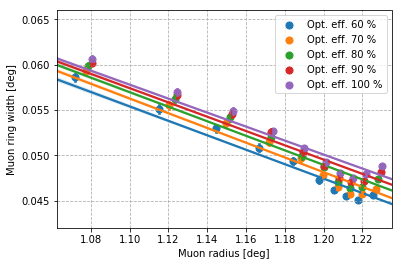

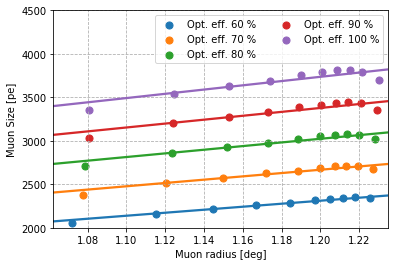

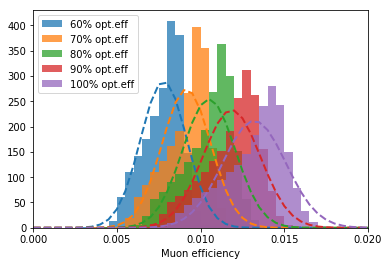

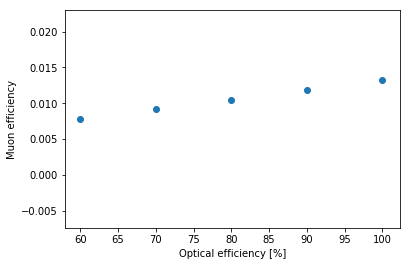

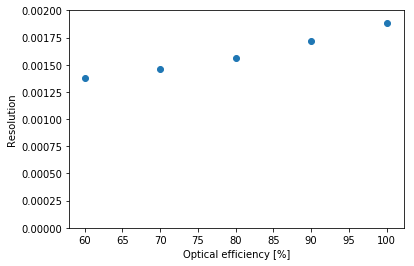

In [20]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

count=0
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for (r,s,w,c,e,ntel,m,col) in zip(RingR,RingS,RingW,RingC,OPT_EFF,NT,MEff,colors):
    #ax.scatter(r[(c > 0.9)], 
    #       w[(c > 0.9)], color='C2',zorder=1)
    sns.regplot(x=r[(c > 0.9) & (ntel == 1)], y=w[(c > 0.9) & (ntel == 1)], 
                     x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax, color=col)
    #ax.scatter(r[(c > 0.9) & (ntel == 1)], w[(c > 0.9) & (ntel == 1)],color=col)

    print(r[(c > 0.9) & (ntel == 1)])
    sns.regplot(x=r[(c > 0.9) & (ntel == 1)], y=s[(c > 0.9) & (ntel == 1)], 
                    x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax2, color=col)

    n, bins, patches = ax3.hist(m[(c > 0.9) & (ntel == 1)], 40, range=[0,0.02], 
                                normed=1, alpha=0.75,label=("%.0f%% opt.eff" % (e*100)), color=col)
    (mu, sigma) = norm.fit(m[(c > 0.9) & (ntel == 1) & (m < 0.025)]) # Fit data         
    y = mlab.normpdf(bins, mu, sigma)
    l = ax3.plot(bins, y, 'k--', linewidth=2, color=col)

    ax4.scatter(e*100,mu,color='C0')
    ax5.scatter(e*100,sigma,color='C0')
    count = count + 1
    if (count==5): 
        break
ax.set_xlabel('Muon radius [deg]')
ax.set_ylabel('Muon ring width [deg]')
ax.grid(linestyle="dashed")
ax.set_ylim(0.042,0.066)
ax.legend()
    
ax2.grid(linestyle="dashed")
ax2.legend(ncol=2)
ax2.set_xlabel('Muon radius [deg]')
ax2.set_ylabel('Muon Size [pe]')
ax2.set_ylim(2000,4500)

ax3.legend()
ax3.set_xlim(0,0.02)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.set_xlabel('Muon efficiency')

#ax4.set_xlim(50,102)
#ax4.set_ylim(0,0.02)
ax4.set_xlabel('Optical efficiency [%]')
ax4.set_ylabel('Muon efficiency')

ax5.set_ylim(0,0.002)
ax5.set_xlabel('Optical efficiency [%]')
ax5.set_ylabel('Resolution')

fig.savefig(maindir+'../../Single_telescope/figures/Width_vs_radius_several_eff_single_tel.png')
fig2.savefig(maindir+'../../Single_telescope/figures/Size_vs_radius_several_eff_single_tel.png')
fig3.savefig(maindir+'../../Single_telescope/figures/Muon_eff_hist_several_eff_single_tel.png')
fig4.savefig(maindir+'../../Single_telescope/figures/Muon_eff_vs_opt_eff_single_tel.png')
fig5.savefig(maindir+'../../Single_telescope/figures/Muon_res_vs_opt_eff_single_tel.png')
plt.show()

In [22]:
# *********** SINGLE TELESCOPE (no NSB) *********
OPT_EFF=[0.6, 0.7, 0.8, 0.9, 1.0]

RingR = []
RingS = []
RingW = []
RingC = []
NT = []
MEff = []

for opt_eff in OPT_EFF:
    file='/Users/rubenlopez/Desktop/INFN/CTA/LST/Muons/Single_telescope/Different_OptEff/muon_0deg_0deg_run71___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff%.1f.fits' % (opt_eff)

    #sfn = sorted(os.listdir(maindir + 'files')) # Sort the filename list

    RingWidth = []
    MuonEff = []
    ImpactParam = []
    RingCont = []
    RingComp = []
    RingPixComp = []
    Core_x = []
    Core_y = []
    Impact_arr_x = []
    Impact_arr_y = []
    MCImpactP = []
    ImpactDiff = []
    RingSize = []
    RingRadius = []
    NTels = []

    table=fits.open("%s" % (file))
    data=table[1].data
        
    MuonEff = np.concatenate([MuonEff,data.field(0)])
    RingWidth = np.concatenate([RingWidth,data.field(2)])
    ImpactParam = np.concatenate([ImpactParam,data.field(1)])
    RingCont = np.concatenate([RingCont,data.field(3)])
    RingComp = np.concatenate([RingComp,data.field(4)])
    RingPixComp = np.concatenate([RingPixComp,data.field(5)])
    Core_x = np.concatenate([Core_x,data.field(6)])
    Core_y = np.concatenate([Core_y,data.field(7)])
    Impact_arr_x = np.concatenate([Impact_arr_x,data.field(8)])
    Impact_arr_y = np.concatenate([Impact_arr_y,data.field(9)])
    MCImpactP = np.concatenate([MCImpactP,data.field(10)])
    ImpactDiff = np.concatenate([ImpactDiff,data.field(11)])
    RingSize = np.concatenate([RingSize,data.field(12)])
    RingRadius = np.concatenate([RingRadius,data.field(13)])
    NTels = np.concatenate([NTels,data.field(14)])
 
    RingR.append(RingRadius)
    RingS.append(RingSize)
    RingW.append(RingWidth)
    RingC.append(RingComp)
    NT.append(NTels)
    MEff.append(MuonEff)

[ 1.14100543  1.06889786  1.07348966 ...,  1.1025517   1.2288045
  1.20724183]
[ 1.13818752  1.07599612  1.20342272 ...,  1.22565308  1.22437712
  1.20799489]
[ 1.12885811  1.06826756  1.23563033 ...,  1.23284331  1.23513068
  1.21075782]
[ 1.19940171  1.21056581  1.13970433 ...,  1.2243127   1.22671768
  1.20966545]
[ 1.2041255   1.12917838  1.06635057 ...,  1.19444627  1.23278422
  1.21290535]


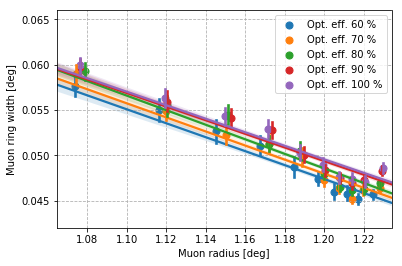

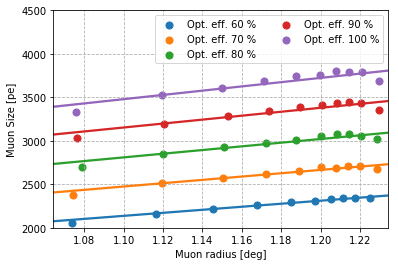

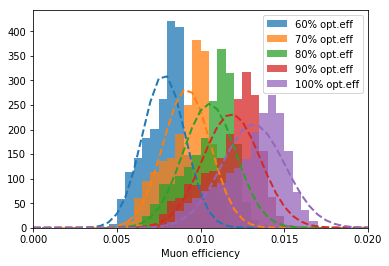

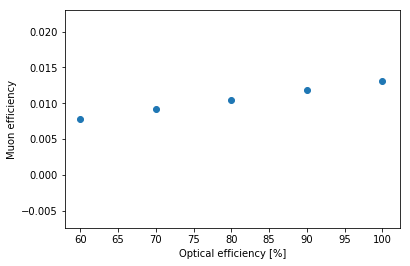

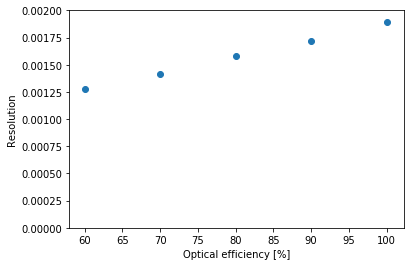

In [23]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

count=0
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for (r,s,w,c,e,ntel,m,col) in zip(RingR,RingS,RingW,RingC,OPT_EFF,NT,MEff,colors):
    #ax.scatter(r[(c > 0.9)], 
    #       w[(c > 0.9)], color='C2',zorder=1)
    sns.regplot(x=r[(c > 0.9) & (ntel == 1)], y=w[(c > 0.9) & (ntel == 1)], 
                     x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax, color=col)
    #ax.scatter(r[(c > 0.9) & (ntel == 1)], w[(c > 0.9) & (ntel == 1)],color=col)

    print(r[(c > 0.9) & (ntel == 1)])
    sns.regplot(x=r[(c > 0.9) & (ntel == 1)], y=s[(c > 0.9) & (ntel == 1)], 
                    x_bins=10, label='Opt. eff. %.0f %%' %(e*100), ax=ax2, color=col)

    n, bins, patches = ax3.hist(m[(c > 0.9) & (ntel == 1)], 40, range=[0,0.02], 
                                normed=1, alpha=0.75,label=("%.0f%% opt.eff" % (e*100)), color=col)
    (mu, sigma) = norm.fit(m[(c > 0.9) & (ntel == 1) & (m < 0.025)]) # Fit data         
    y = mlab.normpdf(bins, mu, sigma)
    l = ax3.plot(bins, y, 'k--', linewidth=2, color=col)

    ax4.scatter(e*100,mu,color='C0')
    ax5.scatter(e*100,sigma,color='C0')
    count = count + 1
    if (count==5): 
        break
ax.set_xlabel('Muon radius [deg]')
ax.set_ylabel('Muon ring width [deg]')
ax.grid(linestyle="dashed")
ax.set_ylim(0.042,0.066)
ax.legend()
    
ax2.grid(linestyle="dashed")
ax2.legend(ncol=2)
ax2.set_xlabel('Muon radius [deg]')
ax2.set_ylabel('Muon Size [pe]')
ax2.set_ylim(2000,4500)

ax3.legend()
ax3.set_xlim(0,0.02)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.set_xlabel('Muon efficiency')

#ax4.set_xlim(50,102)
#ax4.set_ylim(0,0.02)
ax4.set_xlabel('Optical efficiency [%]')
ax4.set_ylabel('Muon efficiency')

ax5.set_ylim(0,0.002)
ax5.set_xlabel('Optical efficiency [%]')
ax5.set_ylabel('Resolution')

fig.savefig(maindir+'../../Single_telescope/figures/Width_vs_radius_several_eff_single_tel_no_noise.png')
fig2.savefig(maindir+'../../Single_telescope/figures/Size_vs_radius_several_eff_single_tel_no_noise.png')
fig3.savefig(maindir+'../../Single_telescope/figures/Muon_eff_hist_several_eff_single_tel_no_noise.png')
fig4.savefig(maindir+'../../Single_telescope/figures/Muon_eff_vs_opt_eff_single_tel_no_noise.png')
fig5.savefig(maindir+'../../Single_telescope/figures/Muon_res_vs_opt_eff_single_tel_no_noise.png')
plt.show()